<a href="https://colab.research.google.com/github/tamaratsilva/ml_mkt_invest_sales/blob/main/RID195176_Desafio04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
#Leitura do arquivo com os dados
MKT = pd.read_csv("/content/MKT.csv", sep = ",")

# Análise Descritiva


In [ ]:
MKT.head() #mostra a 5 primeiras linhas

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
MKT.info() #checagem do tipo de dados + ppossíveis valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
MKT.describe() # estatística descritiva

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
MKT.isnull().sum() #checagem de valores nulos

,0
youtube,0
facebook,0
newspaper,0
sales,0


In [ ]:
MKT.duplicated().sum() #checagem de valores duplicados

0

# Análise Exploratória

The biggest list of python chart examples - https://python-graph-gallery.com/

<Axes: >

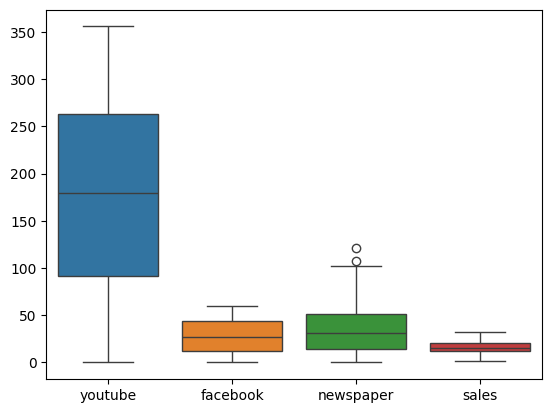

In [ ]:
sns.boxplot(data=MKT) # Gráfico de caixa para verificar outliers (valores inconsistentes)

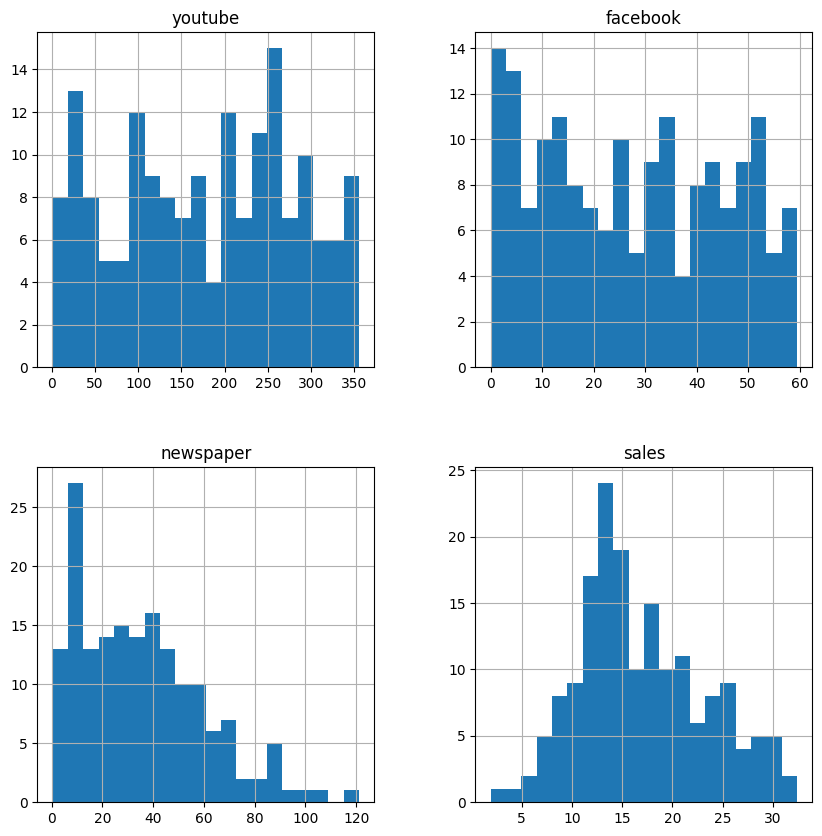

In [ ]:
#Histograma das variáveis numéricas
MKT.hist(bins=20, figsize=(10, 10))
plt.show()

<Axes: >

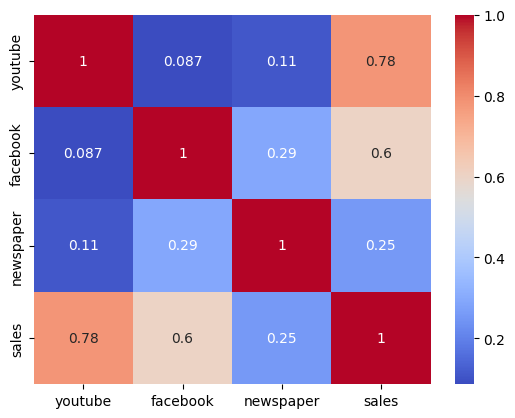

In [ ]:
#Mapa de calor para correlação
corr = MKT.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

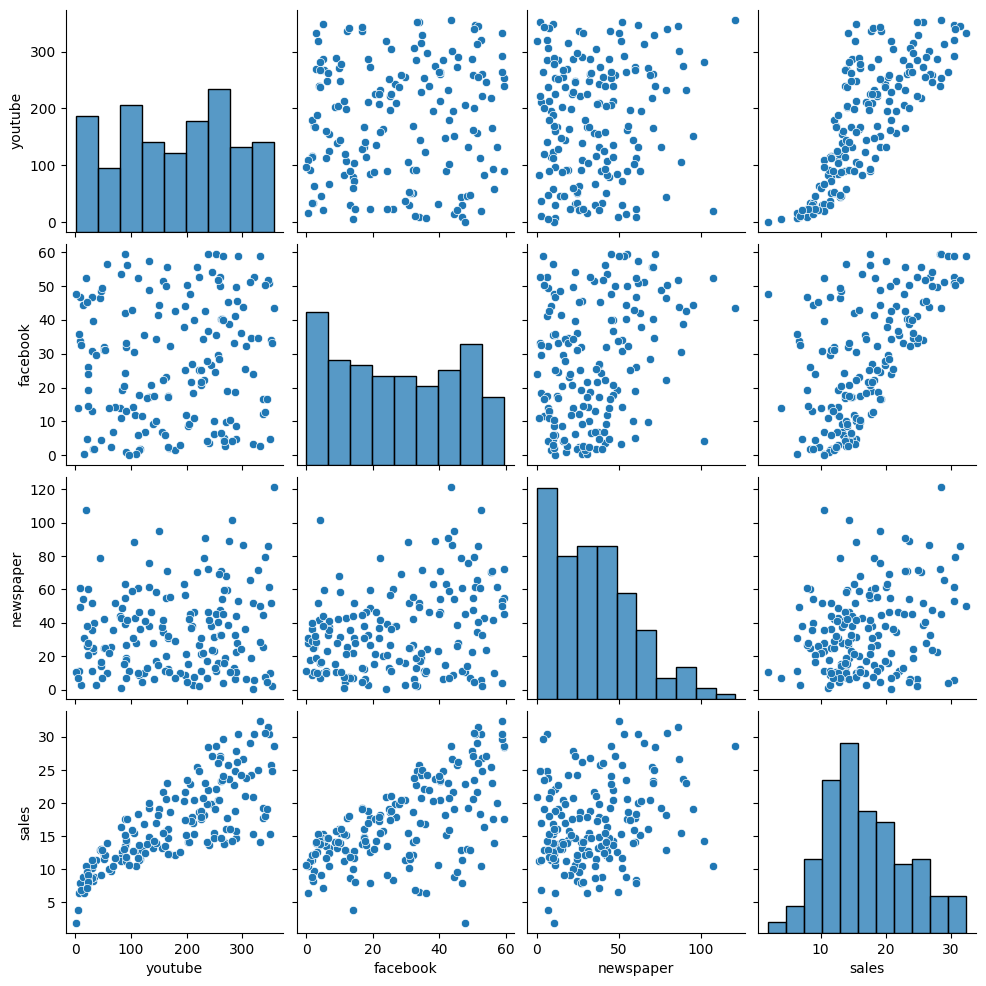

In [ ]:
sns.pairplot(MKT) #CORRELAÇÃO - GRAF DE DISPERSÃO

# MODELAGEM

**Objetivo:** Construir um modelo de regressão para prever o retorno de vendas com base nos investimentos em publicidade.

Obs: utilizado técnicas para criação de um modelo de regressão simples utilizando a biblioteca sklearn.

TÉCNICA 1- REGRESSÃO LINEAR DO SKLEARN https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

TÉCNICA 2- Support Vector Regression do SKLEARN (SVR) https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR


In [ ]:
#SEPARAÇÃO DAS VARIÁVEIS INDEPENDENTES E DEPENDENTES (SALES)
X = MKT[['youtube', 'facebook', 'newspaper']]
y = MKT['sales']

In [ ]:
#DIVISÃO DOS DADOS EM: TREINO (70%) E TESTE (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## **Técnica 1 - REGRESSÃO LINEAR**

In [ ]:
#CONSTRUÇÃO E TREINAMENTO DO MODELO - REGRESSÃO LINEAR DO SKLEARN
RegLinear = LinearRegression()
RegLinear.fit(X_train, y_train)

LinearRegression()

In [ ]:
#AVALIAÇÃO DO MODELO - REGRESSÃO LINEAR DO SKLEARN
y_pred = RegLinear.predict(X_test)
print('MSE Reg Linear:', mean_squared_error(y_test, y_pred))
print('R² Reg Linear:', r2_score(y_test, y_pred))

MSE Reg Linear: 4.699445585122349
R² Reg Linear: 0.882423505618885


## **Técnica 2 - SVR**

In [ ]:
# TREINAMOS O MODELO SVR
regSVR = SVR().fit(X_train, y_train)

In [ ]:
#PREDIZER O MODELO SVR TREINADO ACIMA
ySVR= regSVR.predict(X_test)

In [ ]:
#TESTAR O MODELO SVR
MSEsvr = mean_squared_error(y_test, ySVR)
print("MSE svr: %.2f" % MSEsvr)
#RMSE - RAIZ QUADRADA DO MSEsvr
print ("R² svr:" , np.sqrt(MSEsvr))

MSE svr: 9.30
R² svr: 3.0503256712463402


# **OTIMIZAÇÃO DE HYPERPARAMETROS**
Como o coeficiente R² svr está muito alto e fora do intervalo esperado (normalmente, o 𝑅² varia entre 0 e 1), precisaremos realizar a etapa de hyperparametrização.

Para tal, usaremos GridSearchCV do SKLearn <https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.GridSearchCV.html>

E <https://scikit-learn.org/1.5/modules/generated/sklearn.svm.LinearSVR.html>



In [ ]:
# Pipeline para padronização + SVR
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Padroniza os dados
    ('svr', SVR())
])

# Definindo a grade de hiperparâmetros para o GridSearchCV
param_grid = {
    'svr__kernel': ['linear', 'rbf', 'poly'],    # Testa diferentes kernels
    'svr__C': [0.1, 1, 10, 100],                 # Parâmetro de regularização
    'svr__epsilon': [0.1, 0.5, 1],               # Margem de tolerância para o erro
    'svr__gamma': ['scale', 'auto']              # Coeficiente do kernel rbf/poly
}

# Configurando o GridSearchCV
grid_SVR = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)

# Treinando o modelo com o GridSearchCV
grid_SVR .fit(X_train, y_train)

# Melhor combinação de hiperparâmetros
print("Melhores hiperparâmetros:", grid_SVR .best_params_)

# Previsões no conjunto de teste
y_predSVR = grid_search.predict(X_test)

# Avaliação do modelo ajustado
mse_svr = mean_squared_error(y_test, y_pred)
r2_svr = r2_score(y_test, y_pred)

print(f"MSE SVR Ajustado: {mse_svr:.2f}")
print(f"R² SVR Ajustado: {r2_svr:.2f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Melhores hiperparâmetros: {'svr__C': 100, 'svr__epsilon': 0.1, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
MSE SVR Ajustado: 1.57
R² SVR Ajustado: 0.96


## MEMORANDO SOBRE OS HYPERPARAMETROS

1- Pipeline: Usa StandardScaler para padronizar os dados, garantindo que as variáveis fiquem na mesma escala. Isso é fundamental para o SVR, pois ele é sensível à escala dos dados.
O SVR é adicionado ao pipeline logo após a padronização.

2- Grade de Hiperparâmetros (param_grid):
- kernel: Testa três tipos de kernel: linear, rbf e poly.
- C: Controla a regularização. Valores altos tentam ajustar melhor os dados, mas podem levar ao overfitting.
- epsilon: Define a margem de tolerância ao erro na previsão.
- gamma: Afeta o comportamento dos kernels rbf e poly. O valor 'scale' é uma escolha padrão baseada na variância dos dados, enquanto 'auto' usa

3- GridSearchCV:
- Realiza a busca exaustiva por todas as combinações possíveis de hiperparâmetros com validação cruzada de 5 folds (cv=5).
- scoring='r2': Avalia as combinações com base no coeficiente de determinação **R2**
- n_jobs=-1: Utiliza todos os núcleos do processador para acelerar a busca.

Considerando as duas técnicas, a  que melhor performou foi a **TÉCNICA 2 SVR**

Ou seja, com R² Reg Linear= 0.96 indica que 96% da variabilidade das vendas é explicada pelos investimentos em publicidade, conseguindo assim  prever os valores de vendas com muito mais precisão.

#PREDIÇÃO

In [ ]:
# Convertendo y_test para um array e exibindo as previsões
y_test_array = y_test.values  # Converte para array NumPy
print("\nPrevisões de vendas (primeiros 10 exemplos):")
for i in range(10):
    print(f"Investimento real: {y_test_array[i]:.2f} | Previsão: {y_pred[i]:.2f}")




Previsões de vendas (primeiros 10 exemplos):
Investimento real: 1.92 | Previsão: 8.64
Investimento real: 26.04 | Previsão: 27.06
Investimento real: 18.24 | Previsão: 17.92
Investimento real: 20.52 | Previsão: 20.16
Investimento real: 12.36 | Previsão: 12.28
Investimento real: 10.44 | Previsão: 11.36
Investimento real: 14.28 | Previsão: 14.85
Investimento real: 23.52 | Previsão: 23.86
Investimento real: 11.52 | Previsão: 11.76
Investimento real: 24.96 | Previsão: 25.48


In [ ]:
# Simulando diferentes investimentos em publicidade
novos_investimentos = [[100, 50, 30], [200, 80, 50], [300, 120, 70]]
previsoes = grid_SVR.predict(novos_investimentos)

for i, inv in enumerate(novos_investimentos):
    print(f"Investimento: YouTube={inv[0]}, Facebook={inv[1]}, Jornal={inv[2]} -> Previsão de vendas: {previsoes[i]:.2f}")


Investimento: YouTube=100, Facebook=50, Jornal=30 -> Previsão de vendas: 17.27
Investimento: YouTube=200, Facebook=80, Jornal=50 -> Previsão de vendas: 24.57
Investimento: YouTube=300, Facebook=120, Jornal=70 -> Previsão de vendas: 16.62


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
